<a href="https://colab.research.google.com/github/AmyMorrison2/Capstone/blob/main/Copy_of_CAPSTONE_DELIVERABLE_MORRISON_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Milestone--Data Acquisition

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# define index names: ^GSPC = S&P 500, ^DJI = DOW Jones, ^IXIC=NASDAQ 100, ^RUT = Russell 2000
index_names = ['^GSPC', '^DJI', '^IXIC', '^RUT']

# define date range (2018-2023 to examine trends across 6 year-period which contains the time frame of the crash)
start_date_string = "2018-01-01"
end_date_string = "2023-12-31"

# pull data from Yahoo Finance
raw_data = yf.download(index_names, start=start_date_string, end=end_date_string)

[*********************100%%**********************]  4 of 4 completed


In [ ]:
# Milestone--EDA

# examine raw data
raw_data

Price          Adj Close                                          \
Ticker              ^DJI        ^GSPC         ^IXIC         ^RUT   
Date                                                               
2018-01-02  24824.009766  2695.810059   7006.899902  1550.010010   
2018-01-03  24922.679688  2713.060059   7065.529785  1552.579956   
2018-01-04  25075.130859  2723.989990   7077.910156  1555.719971   
2018-01-05  25295.869141  2743.149902   7136.560059  1560.010010   
2018-01-08  25283.000000  2747.709961   7157.390137  1561.810059   
...                  ...          ...           ...          ...   
2023-12-22  37385.968750  4754.629883  14992.969727  2033.959961   
2023-12-26  37545.328125  4774.750000  15074.570312  2059.189941   
2023-12-27  37656.519531  4781.580078  15099.179688  2066.209961   
2023-12-28  37710.101562  4783.350098  15095.139648  2058.340088   
2023-12-29  37689.539062  4769.830078  15011.349609  2027.069946   

Price              Close                                          \
Ticker              ^DJI        ^GSPC         ^IXIC         ^RUT   
Date                                                               
2018-01-02  24824.009766  2695.810059   7006.899902  1550.010010   
2018-01-03  24922.679688  2713.060059   7065.529785  1552.579956   
2018-01-04  25075.130859  2723.989990   7077.910156  1555.719971   
2018-01-05  25295.869141  2743.149902   7136.560059  1560.010010   
2018-01-08  25283.000000  2747.709961   7157.390137  1561.810059   
...                  ...          ...           ...          ...   
2023-12-22  37385.968750  4754.629883  14992.969727  2033.959961   
2023-12-26  37545.328125  4774.750000  15074.570312  2059.189941   
2023-12-27  37656.519531  4781.580078  15099.179688  2066.209961   
2023-12-28  37710.101562  4783.350098  15095.139648  2058.340088   
2023-12-29  37689.539062  4769.830078  15011.349609  2027.069946   

Price               High               ...           Low               \
Ticker              ^DJI        ^GSPC  ...         ^IXIC         ^RUT   
Date                                   ...                              
2018-01-02  24864.189453  2695.889893  ...   6924.080078  1536.119995   
2018-01-03  24941.919922  2714.370117  ...   7016.700195  1547.589966   
2018-01-04  25105.960938  2729.290039  ...   7072.379883  1552.369995   
2018-01-05  25299.789062  2743.449951  ...   7097.080078  1552.130005   
2018-01-08  25311.990234  2748.510010  ...   7124.089844  1548.229980   
...                  ...          ...  ...           ...          ...   
2023-12-22  37534.519531  4772.939941  ...  14927.120117  2025.750000   
2023-12-26  37617.988281  4784.720215  ...  15024.059570  2039.349976   
2023-12-27  37683.699219  4785.390137  ...  15051.669922  2056.370117   
2023-12-28  37778.851562  4793.299805  ...  15087.219727  2053.639893   
2023-12-29  37759.429688  4788.430176  ...  14955.370117  2027.069946   

Price               Open                                             Volume  \
Ticker              ^DJI        ^GSPC         ^IXIC         ^RUT       ^DJI   
Date                                                                          
2018-01-02  24809.349609  2683.729980   6937.649902  1536.119995  341130000   
2018-01-03  24850.449219  2697.850098   7017.069824  1550.280029  456790000   
2018-01-04  24964.859375  2719.310059   7089.500000  1552.979980  403280000   
2018-01-05  25114.919922  2731.330078   7105.740234  1555.869995  358020000   
2018-01-08  25308.400391  2742.669922   7135.379883  1559.800049  341390000   
...                  ...          ...           ...          ...        ...   
2023-12-22  37349.269531  4753.919922  15006.179688  2028.219971  252970000   
2023-12-26  37405.898438  4758.859863  15028.690430  2043.140015  212420000   
2023-12-27  37518.621094  4773.450195  15089.660156  2063.590088  245530000   
2023-12-28  37661.519531  4786.439941  15142.089844  2058.179932  199550000   
2023-12-29  37701.628906  4782.879883  15099

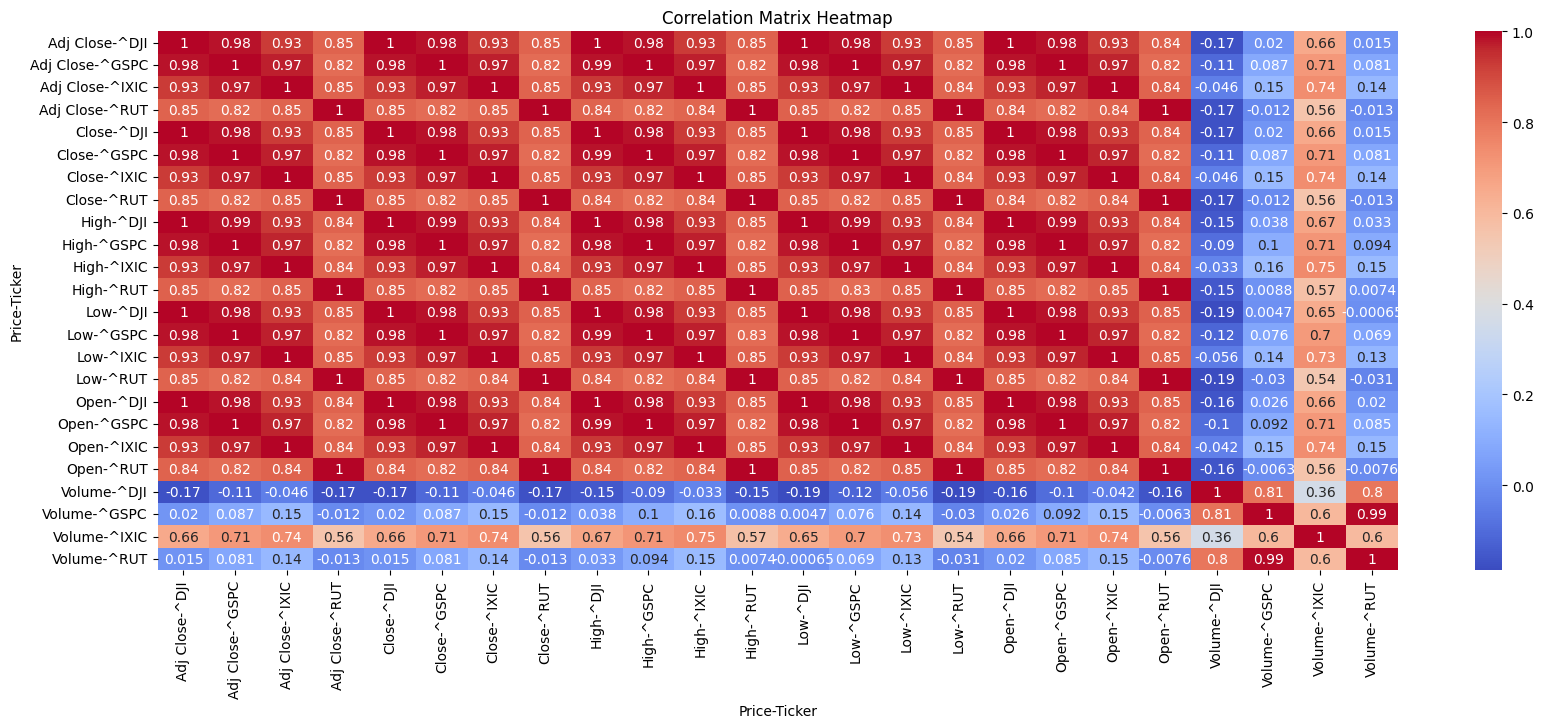

In [ ]:
# Milestone--EDA

# heat map of raw data
import seaborn as sns
plt.rcParams['text.usetex'] = False

corr_matrix = raw_data.corr()
plt.figure(figsize=(20, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Comments on Correlation Findings**

The heat map reveals strong correlations (above 0.82) among adjusted close, close, high, low, and open prices within and across all four stock market indices. Volume was moderately or minimally correlated with the price variables. The volume trades among three indices (DJI, GSPC, RUT) were highly correlated; however, IXIC was only moderately or minimally correlated with the other indices.

The high correlation among the price variables reflects stock prices moving in a relatively tight range within a given trading period. The low correlation between volume and other price variables suggests that trading volume (number of shares traded within a given timeframe) may not be directly influenced by stock market prices consistently (and vice versa).

Because the price variables are highly correlated, adjusted close price will be used as the dependent variable (i.e., target) when conducting analyses. This reduces redundancy without reducing the quality of depth of insights in stock performance. In addition, adjusted close price is the ideal variable to choose because it more accurately reflects the total return of the stock and accounts for a variety of corporate actions such as stock splits and dividends.

In [ ]:
# Milestone--EDA

# keep only adjusted closing prices
df_close = raw_data['Adj Close'].dropna(axis='rows')

# examine new dataset
df_close

Ticker,^DJI,^GSPC,^IXIC,^RUT
Date,,,,
2018-01-02,24824.009766,2695.810059,7006.899902,1550.010010
2018-01-03,24922.679688,2713.060059,7065.529785,1552.579956
2018-01-04,25075.130859,2723.989990,7077.910156,1555.719971
2018-01-05,25295.869141,2743.149902,7136.560059,1560.010010
2018-01-08,25283.000000,2747.709961,7157.390137,1561.810059
...,...,...,...,...
2023-12-22,37385.968750,4754.629883,14992.969727,2033.959961
2023-12-26,37545.328125,4774.750000,15074.570312,2059.189941
2023-12-27,37656.519531,4781.580078,15099.179688,2066.209961


In [ ]:
# Milestone--EDA

# examine summary statistics of the adjusted close prices for the four stock indices
df_close.describe()

Ticker,^DJI,^GSPC,^IXIC,^RUT
count,1509.000000,1509.000000,1509.000000,1509.000000
mean,29893.358365,3587.896514,10854.997025,1770.870028
std,4167.130261,691.533312,2761.240967,281.973126
min,18591.929688,2237.399902,6192.919922,991.159973
25%,25986.919922,2888.320068,7967.759766,1559.760010
50%,30015.509766,3677.949951,11143.740234,1722.020020
75%,33910.851562,4204.310059,13457.250000,1951.329956
max,37710.101562,4796.560059,16057.440430,2442.739990


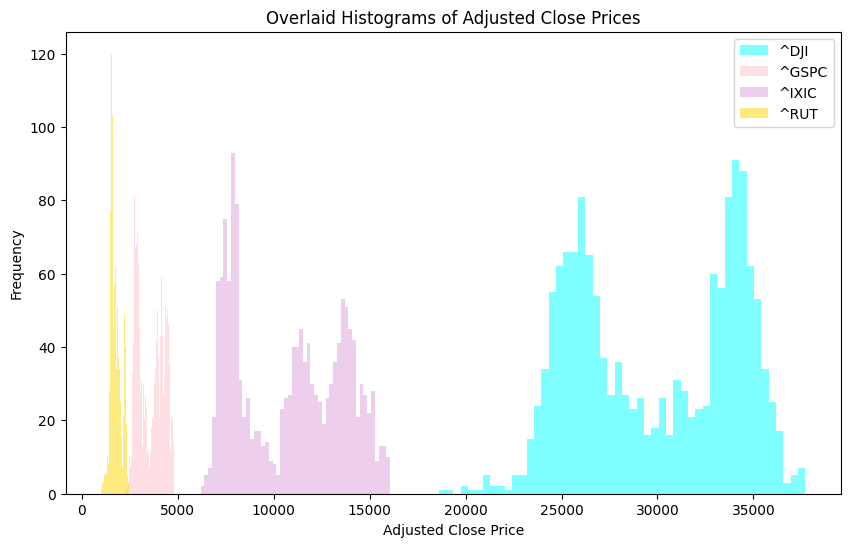

In [ ]:
# Milestone--EDA

# display histograms of the adjusted close prices of each index in same graph
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(10, 6))
colors = ['aqua', 'pink', 'plum', 'gold']

for i, column in enumerate(df_close.columns):
    plt.hist(df_close[column], bins=50, alpha=0.5, label=column, color=colors[i])

plt.title('Overlaid Histograms of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Comments on Overlaid Adjusted Close Prices Histograms**

A bimodal distribution was most evident for the S&P 500 and Dow Jones. The Russell 2000 also provided some indication of a bimodal distribution. The Nasdaq 100 exhibited a trimodal distribution. Price levels within the indices oscillated over time. Distinct peaks within these distributions reveal periods of volatility and risk associated with the assets underlying the indices. Further analysis is needed.

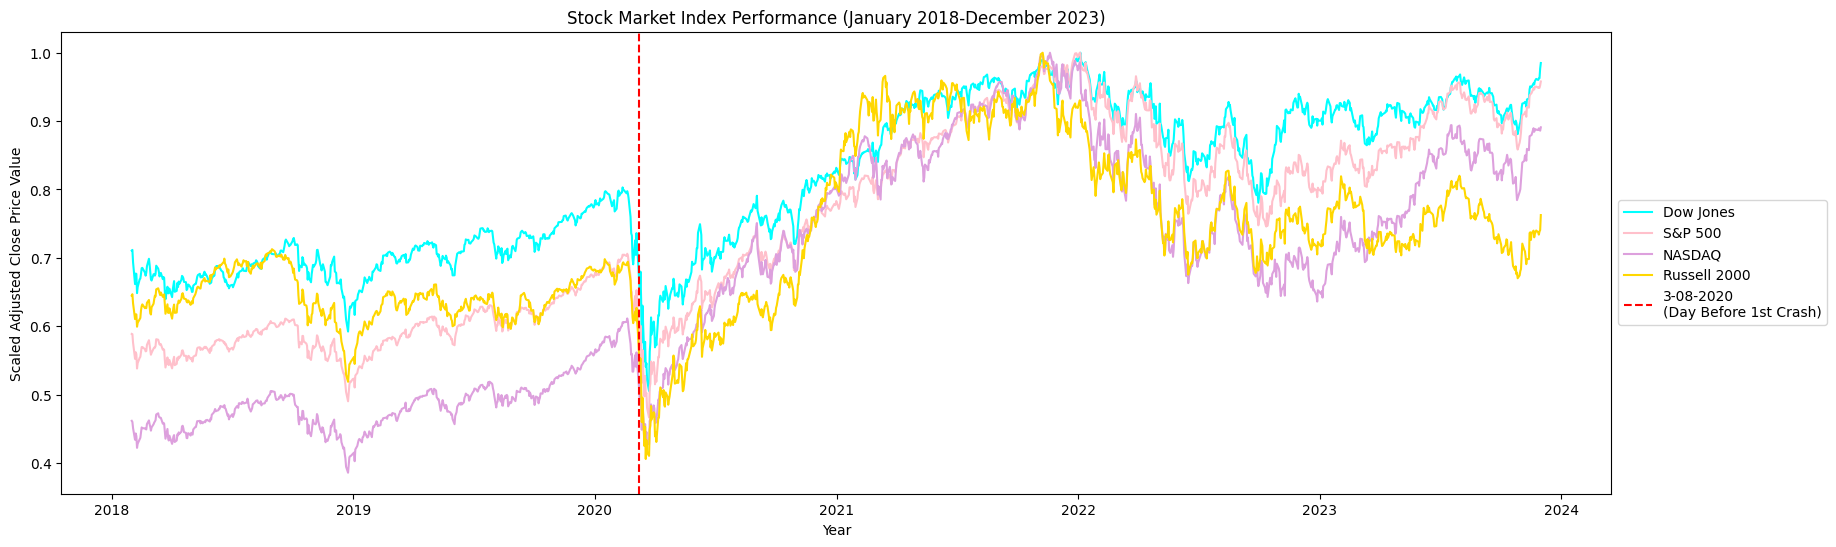

In [ ]:
w = 20 # time window size
n = len(raw_data)-(2*w)+1 # number of time segments

import pandas as pd

index_labels = ['Dow Jones', 'S&P 500', 'NASDAQ', 'Russell 2000']

plt.figure(figsize=(20,6))

colors = ['aqua', 'pink', 'plum', 'gold']
for i in range(df_close.shape[1]):
    plt.plot(raw_data.index[w:n+w], df_close.iloc[w:n+w, i] / max(df_close.iloc[w:n+w, i]), label=index_labels[i], color=colors[i])

# Highlight day before the first crash of March 9, 2020
specific_date = '2020-03-08'
plt.axvline(x=pd.to_datetime(specific_date), color='red', linestyle='--', label='3-08-2020\n(Day Before 1st Crash)')

plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Year')
plt.ylabel('Scaled Adjusted Close Price Value')
plt.title('Stock Market Index Performance (January 2018-December 2023)');

**Comments on Stock Market Performance**

This graph reveals a significant drop in all four indices in the first quarter of 2020. There was a slight decline in the adjusted close prices prior to the March 9, 2020 crash; however, this decline was on par with other declines observed during the six-year period. There was no significant indicator that a crash was about to occur based on the adjusted close prices. In addition, no other substantial decline in adjusted close prices was observed during this six-year period.

In [ ]:
# Milestone--Data Preprocessing

# convert Pandas dataframe to Numpy array of adjusted closing prices (to make numerical calculations easier)
P = df_close.to_numpy()

# display Numpy array
P

array([[24824.00976562,  2695.81005859,  7006.89990234,  1550.01000977],
       [24922.6796875 ,  2713.06005859,  7065.52978516,  1552.57995605],
       [25075.13085938,  2723.98999023,  7077.91015625,  1555.7199707 ],
       ...,
       [37656.51953125,  4781.58007812, 15099.1796875 ,  2066.20996094],
       [37710.1015625 ,  4783.35009766, 15095.13964844,  2058.34008789],
       [37689.5390625 ,  4769.83007812, 15011.34960938,  2027.06994629]])

In [ ]:
# Milestone--Data Preprocessing

# calculate log-returns defined as the log of the ratio between closing values of two subsequent days (normalizes returns and can assist with statistical analysis)
r = np.log(np.divide(P[1:],P[:len(P)-1]))

# display Numpy array of log returns
r

array([[ 0.0039669 ,  0.00637843,  0.00833264,  0.00165665],
       [ 0.00609833,  0.00402054,  0.00175069,  0.00202041],
       [ 0.00876455,  0.00700915,  0.00825219,  0.0027538 ],
       ...,
       [ 0.00295715,  0.00142944,  0.00163118,  0.00340332],
       [ 0.0014219 ,  0.00037011, -0.0002676 , -0.00381612],
       [-0.00054543, -0.00283048, -0.00556626, -0.0153085 ]])

In [ ]:
# Milestone--Data Preprocessing

# convert to csv file
import pandas as pd
df_CSV = pd.DataFrame(r)
df_CSV.to_csv('Stock_Market_Log_Returns', index=False)

In [ ]:
# Milestone--Follow-up EDA

# put log returns into dataframe to calculate summary statistics
import pandas as pd
r_df = pd.DataFrame(r)

# display dataframe
r_df

,0,1,2,3
0,0.003967,0.006378,0.008333,0.001657
1,0.006098,0.004021,0.001751,0.002020
2,0.008765,0.007009,0.008252,0.002754
3,-0.000509,0.001661,0.002915,0.001153
4,0.004058,0.001302,0.000864,-0.001096
...,...,...,...,...
1503,-0.000492,0.001659,0.001943,0.008344
1504,0.004253,0.004223,0.005428,0.012328
1505,0.002957,0.001429,0.001631,0.003403
1506,0.001422,0.000370,-0.000268,-0.003816


In [ ]:
# Milestone--Follow-Up EDA

# display summary statistics of log returns
r_df.describe()

,0,1,2,3
count,1508.000000,1508.000000,1508.000000,1508.000000
mean,0.000277,0.000378,0.000505,0.000178
std,0.012937,0.013075,0.015485,0.016509
min,-0.138418,-0.127652,-0.131492,-0.153991
25%,-0.004685,-0.005018,-0.006331,-0.007844
50%,0.000736,0.000844,0.001178,0.000757
75%,0.006114,0.006913,0.008666,0.008924
max,0.107643,0.089683,0.089347,0.089763


In [ ]:
# Milestone--Follow-Up EDA

# confirm df_close index is Datetime for proper formatting
print(df_close.index)

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1509, freq=None)


In [ ]:
# Milestone--Follow-Up EDA

# add date index from adjusted close dataframe to log returns dataframe omitting first row
r_df.index = df_close.index[1:]
#add column names back
r_df.columns = ['DJI', 'GSPC', 'IXIC', 'RUT']
r_df

,DJI,GSPC,IXIC,RUT
Date,,,,
2018-01-03,0.003967,0.006378,0.008333,0.001657
2018-01-04,0.006098,0.004021,0.001751,0.002020
2018-01-05,0.008765,0.007009,0.008252,0.002754
2018-01-08,-0.000509,0.001661,0.002915,0.001153
2018-01-09,0.004058,0.001302,0.000864,-0.001096
...,...,...,...,...
2023-12-22,-0.000492,0.001659,0.001943,0.008344
2023-12-26,0.004253,0.004223,0.005428,0.012328
2023-12-27,0.002957,0.001429,0.001631,0.003403


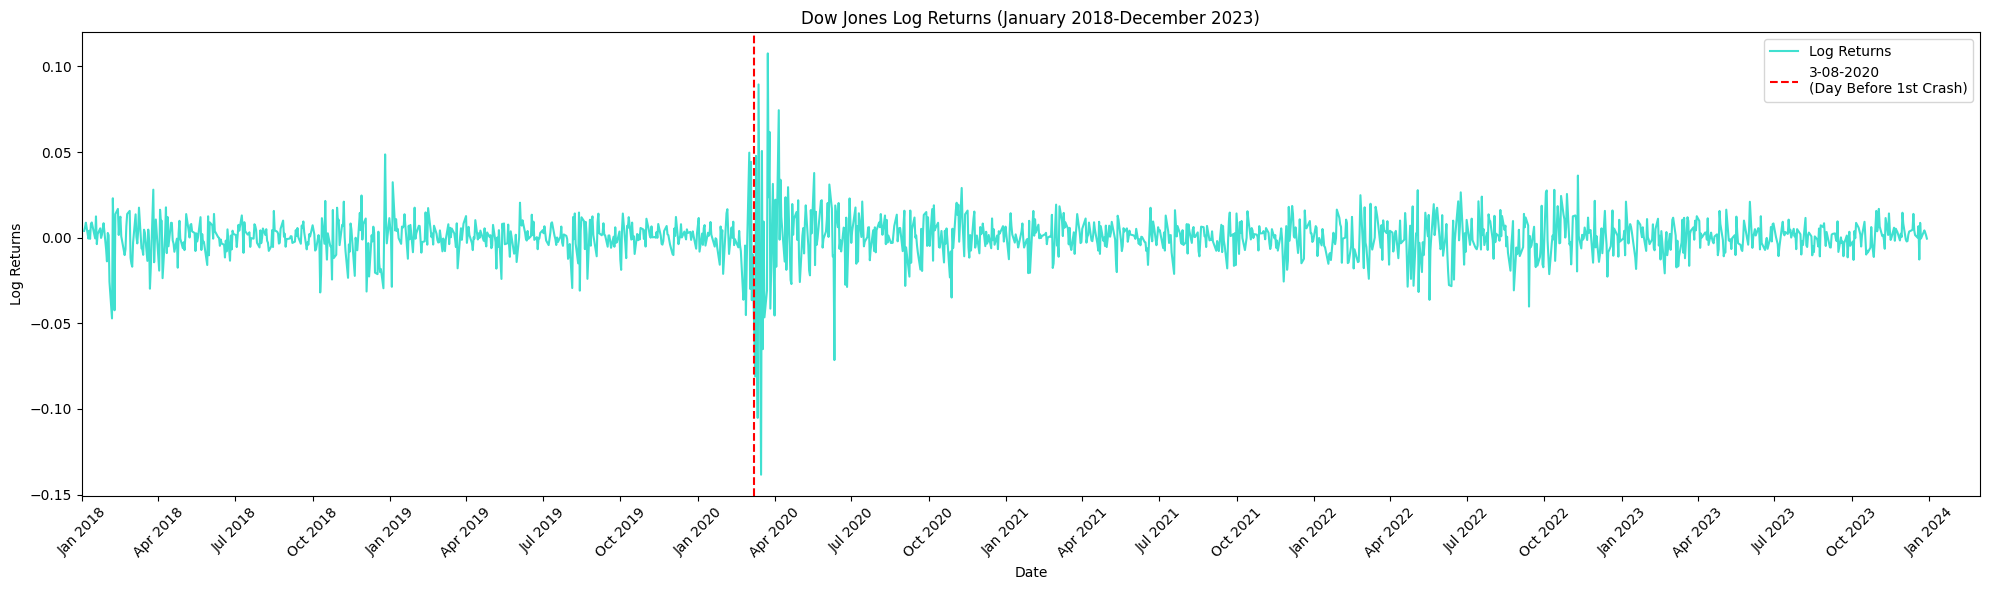

In [ ]:
# Milestone--Follow-Up EDA

# graph log returns over time for the Dow Jones
import matplotlib.dates as mdates
#r_df.index = pd.to_datetime(r_df.index)

plt.rcParams['text.usetex'] = False

plt.figure(figsize=(20, 6))
plt.plot(r_df.index, r_df.iloc[:, 0], label='Log Returns', color='turquoise')

start_date = pd.to_datetime('2017-12-31')
end_date = pd.to_datetime('2024-03-01')
plt.xlim(start_date, end_date)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title('Dow Jones Log Returns (January 2018-December 2023)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight a specific date (day before first crash)
specific_date = '2020-03-08'
plt.axvline(x=pd.to_datetime(specific_date), color='red', linestyle='--', label='3-08-2020\n(Day Before 1st Crash)')
plt.legend()
plt.show()

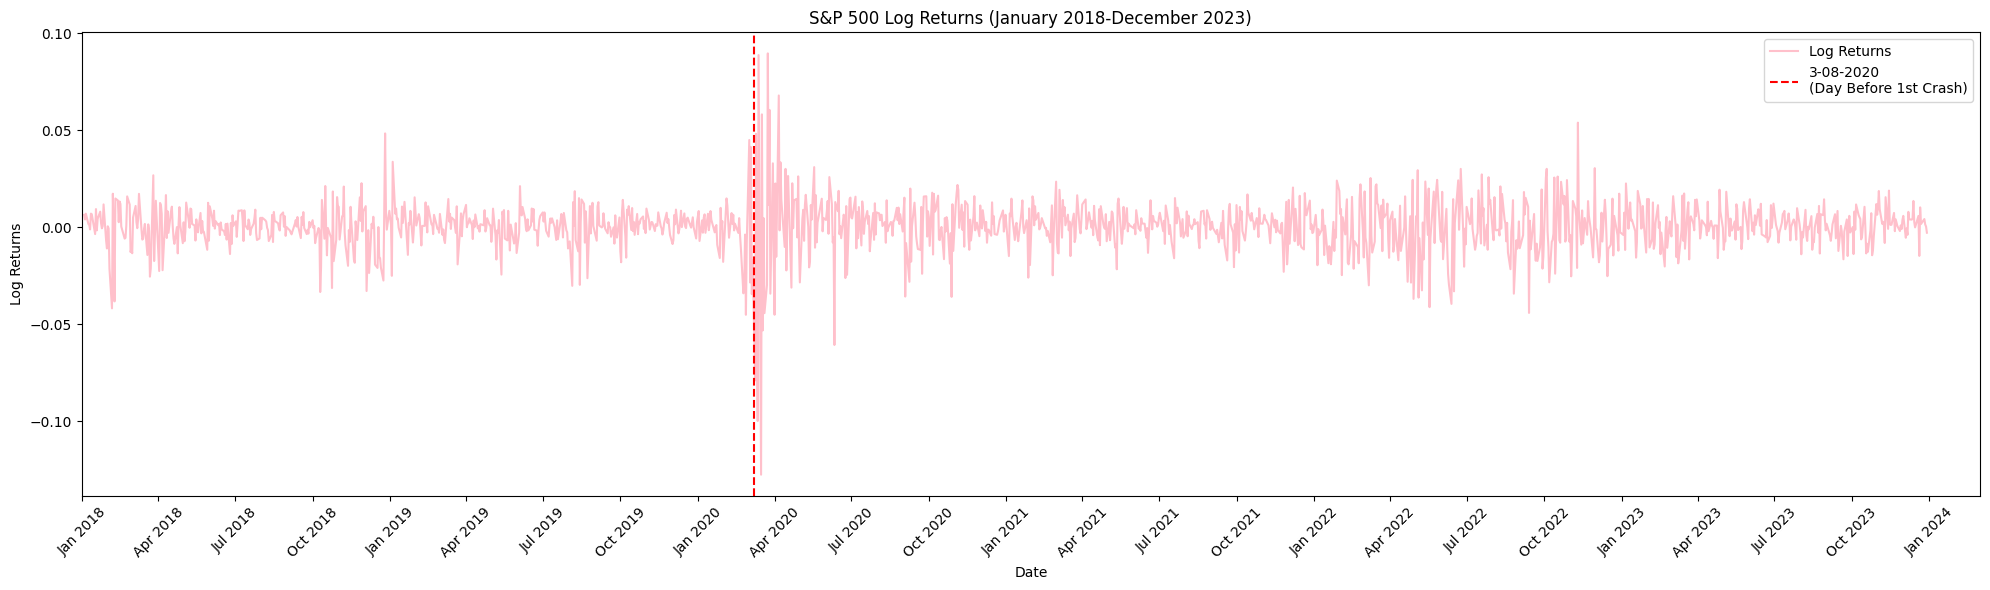

In [ ]:
# Milestone--Follow-Up EDA

# graph log returns over time for the S&P 500
plt.rcParams['text.usetex'] = False

plt.figure(figsize=(20, 6))
plt.plot(r_df.index, r_df.iloc[:, 1], label='Log Returns', color='pink')

start_date = pd.to_datetime('2017-12-31')
end_date = pd.to_datetime('2024-03-01')
plt.xlim(start_date, end_date)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title('S&P 500 Log Returns (January 2018-December 2023)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight a specific date (day before first crash)
specific_date = '2020-03-08'
plt.axvline(x=pd.to_datetime(specific_date), color='red', linestyle='--', label='3-08-2020\n(Day Before 1st Crash)')
plt.legend()
plt.show()

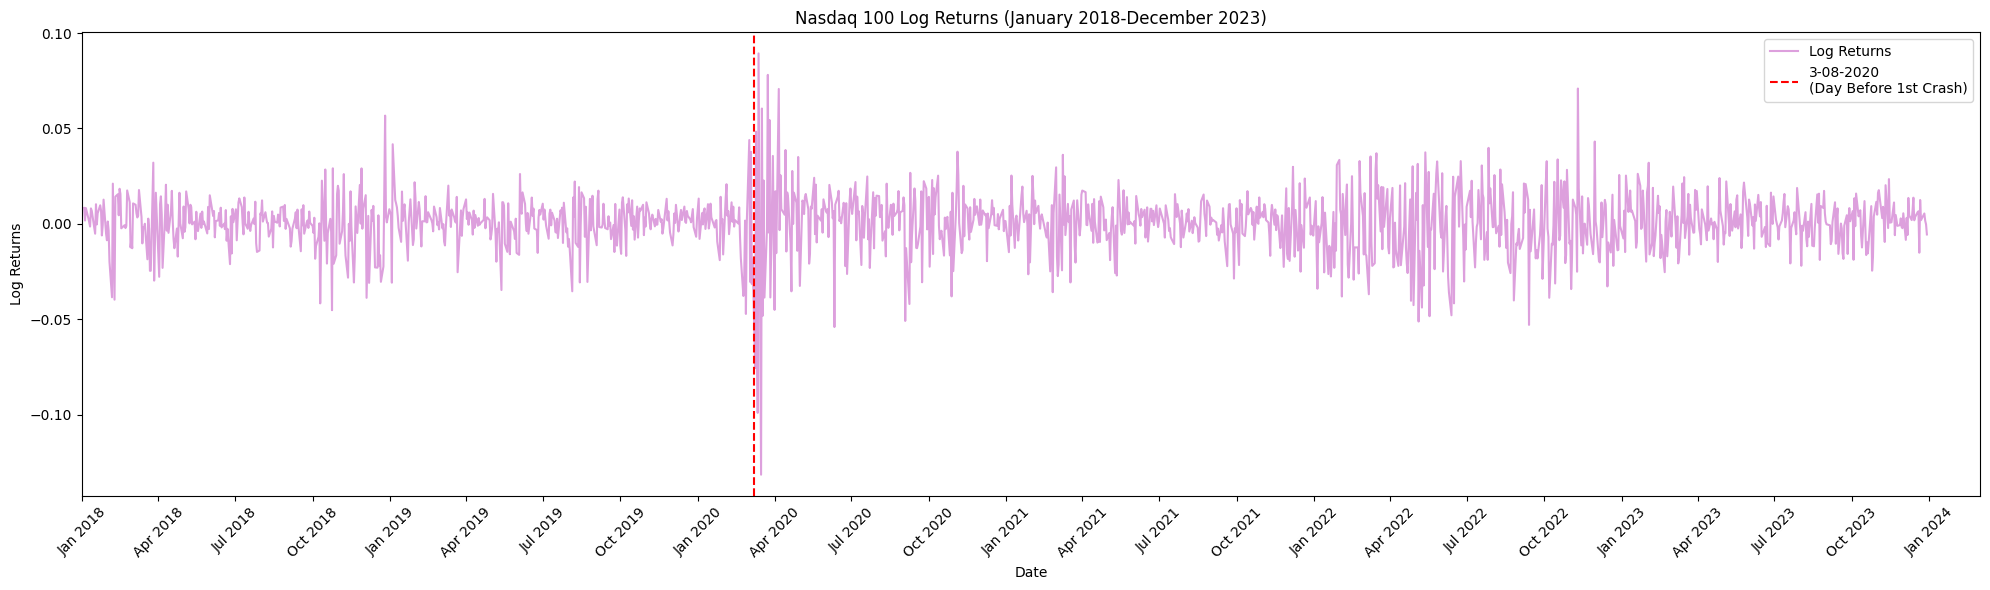

In [ ]:
# Milestone--Follow-Up EDA

# graph log returns over time for the Nasdaq 100
plt.rcParams['text.usetex'] = False

plt.figure(figsize=(20, 6))
plt.plot(r_df.index, r_df.iloc[:, 2], label='Log Returns', color='plum')

start_date = pd.to_datetime('2017-12-31')
end_date = pd.to_datetime('2024-03-01')
plt.xlim(start_date, end_date)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title('Nasdaq 100 Log Returns (January 2018-December 2023)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight a specific date (day before first crash)
specific_date = '2020-03-08'
plt.axvline(x=pd.to_datetime(specific_date), color='red', linestyle='--', label='3-08-2020\n(Day Before 1st Crash)')
plt.legend()
plt.show()

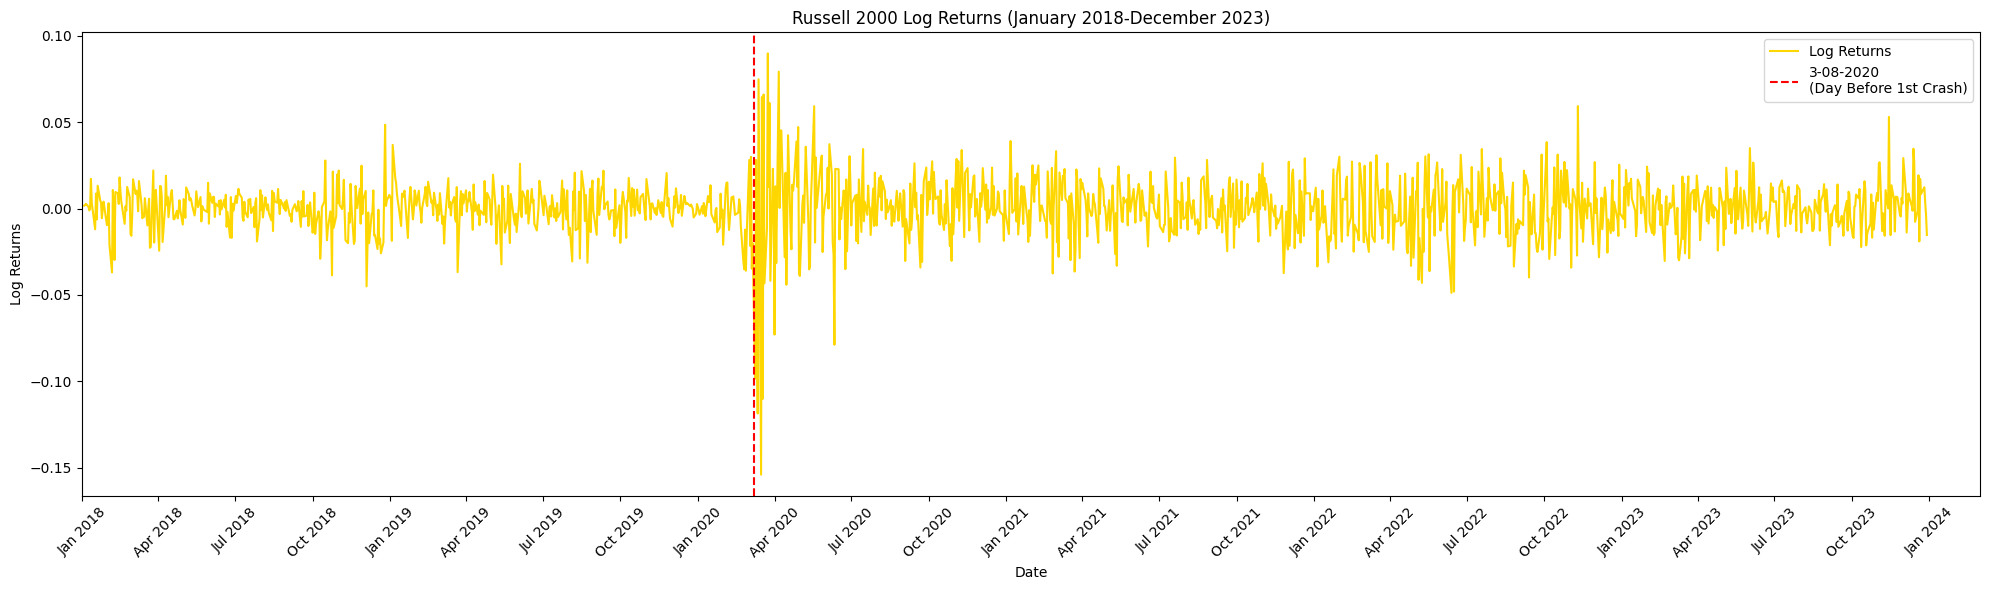

In [ ]:
# Milestone--Follow-Up EDA

# graph log returns over time for the Russell 2000
plt.rcParams['text.usetex'] = False

plt.figure(figsize=(20, 6))
plt.plot(r_df.index, r_df.iloc[:, 3], label='Log Returns', color='gold')

start_date = pd.to_datetime('2017-12-31')
end_date = pd.to_datetime('2024-03-01')
plt.xlim(start_date, end_date)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title('Russell 2000 Log Returns (January 2018-December 2023)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight a specific date (day before first crash)
specific_date = '2020-03-08'
plt.axvline(x=pd.to_datetime(specific_date), color='red', linestyle='--', label='3-08-2020\n(Day Before 1st Crash)')
plt.legend()
plt.show()

**Comments on Date vs. Log Return Graphs**

Graphs for all 4 indices show signficant fluctuation in log returns starting on 3-9-2020 (date of first crash). The most dramatic decrease occurred immediately after that time. Additional (although less dramatic) spikes in negative log returns continued until approximately June 2020. However, the time period leading up to the crash did not reveal any significant differences in log returns when compared to other time periods between 2018 and 2023. Thus, there was not a noticeable indicator based on log returns that a significant crash was about to occur (up to and including the day before).

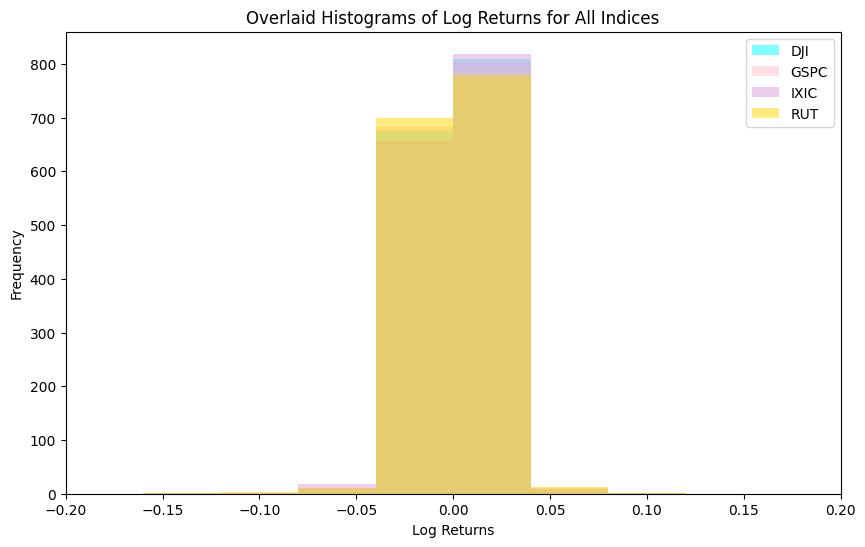

In [ ]:
# Milestone--Follow-Up EDA

# display log return data of stock indices in overlaid histogram
plt.rcParams['text.usetex'] = False
index_names = ['DJI', 'GSPC', 'IXIC', 'RUT']
colors = ['aqua', 'pink', 'plum', 'gold']
plt.figure(figsize=(10, 6))

for i in range(r.shape[1]):
    plt.hist(r[:, i], bins=50, alpha=0.5, label=index_names[i], color=colors[i], range=[-1, 1])

plt.title('Overlaid Histograms of Log Returns for All Indices')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(-0.2, 0.2)
plt.show()

**Comments on Log Returns Overlaid Histogram**

The four indices performed similarly overall. The bimodal distributions reflect a pattern of gain and loss and align with histograms of adjusted close prices. Overall, there were more instances of price increases; however, there were still a significant number of negative returns. Negative log returns were less frequent; however, perhaps more pronounced. This could indicate a volatile market, swing in market sentiment, and/or impact of a significant external event. Unable to make prediction based on this distribution alone.